In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
anime = pd.read_csv('anime.csv')
users = pd.read_csv('users_cleaned.csv')
anime


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


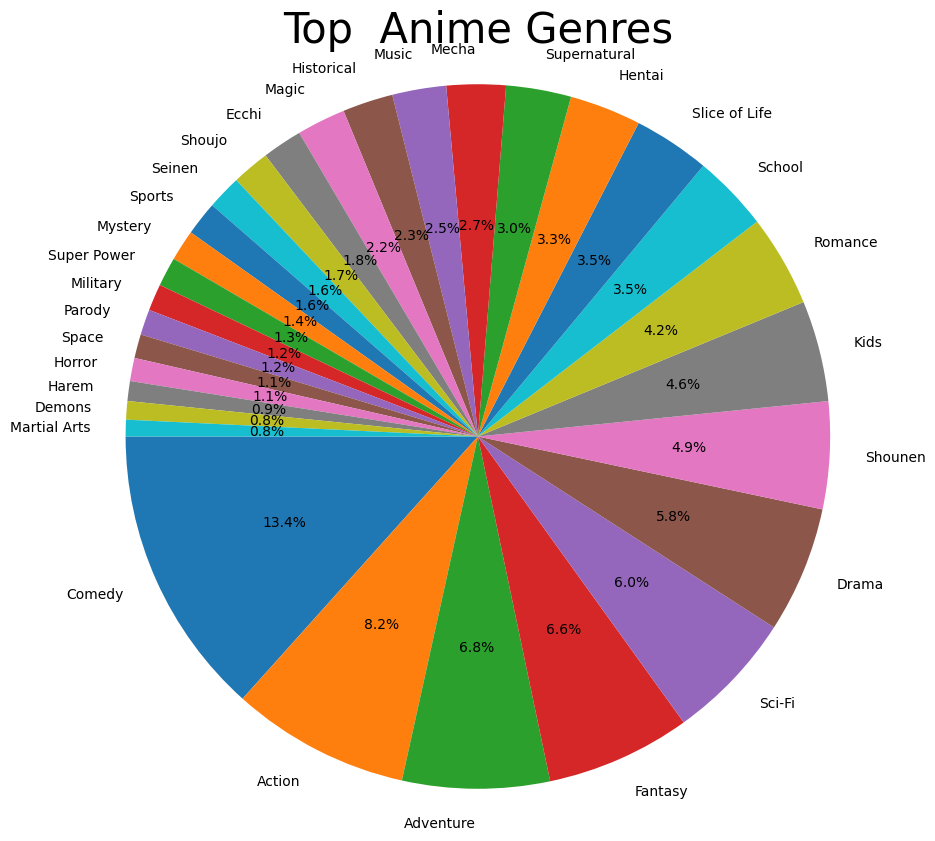

In [8]:

anime = anime.dropna(subset=['genre'])

# Get the top 10 genres
top_genres = anime['genre'].str.split(', ').explode().value_counts().nlargest(30)

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=900)
plt.title('Top  Anime Genres', fontsize=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

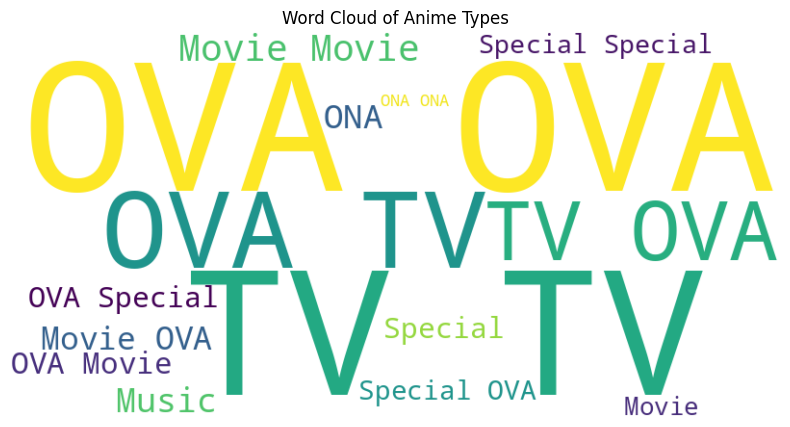

In [9]:
from wordcloud import WordCloud

# Generate a word cloud from the anime types
type_text = ' '.join(anime['type'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(type_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Anime Types')
plt.show()

In [24]:
from ipywidgets import Dropdown, Button, Output, VBox, IntSlider, HTML
from IPython.display import display, clear_output

# Dropdown for genre selection
genre_dropdown = Dropdown(options=['All'] + sorted(anime['genre'].str.split(', ').explode().dropna().unique().tolist()), description="Genre:")

# Dropdown for time period selection
time_period_dropdown = Dropdown(
    options=['All Time', 'Top 10', 'Top 20', 'Top 30', 'Top 40', 'Top 50'],
    description='Filter:'
)

# Slider for dynamic Top N selection (enabled only in All Time mode)
top_n_slider = IntSlider(min=10, max=100, step=10, value=10, description='Top N:')

# Go button
go_button = Button(description='Go', button_style='success')

# Output widget to display results
output_widget = Output()

# Function to filter and display anime
def display_anime(b):
    with output_widget:
        clear_output(wait=True)
        selected_genre = genre_dropdown.value
        selected_time_period = time_period_dropdown.value
        selected_top_n = top_n_slider.value

        filtered_anime = anime.copy()

        # Genre filtering
        if selected_genre != 'All':
            filtered_anime = filtered_anime[filtered_anime['genre'].str.contains(selected_genre, na=False)]

        # Match-case block for top filtering
        match selected_time_period:
            case 'Top 10':
                filtered_anime = filtered_anime.nlargest(10, 'rating')
            case 'Top 20':
                filtered_anime = filtered_anime.nlargest(20, 'rating')
            case 'Top 30':
                filtered_anime = filtered_anime.nlargest(30, 'rating')
            case 'Top 40':
                filtered_anime = filtered_anime.nlargest(40, 'rating')
            case 'Top 50':
                filtered_anime = filtered_anime.nlargest(50, 'rating')
            case 'All Time':
                filtered_anime = filtered_anime.nlargest(selected_top_n, 'rating')

        if not filtered_anime.empty:
            display(HTML(filtered_anime[['name', 'genre', 'type', 'episodes', 'rating']].to_html(index=False)))
        else:
            print("No anime found matching your criteria.")

# Link the button to the function
go_button.on_click(display_anime)

# Arrange widgets in a VBox
controls = VBox([
    HTML("<h3>🎌 Filter Top Anime by Genre and Rating</h3>"),
    genre_dropdown,
    time_period_dropdown,
    top_n_slider,
    go_button
])

# Display the controls and the output area
display(controls, output_widget)


Output()

In [27]:
from ipywidgets import Dropdown, Button, Output, VBox, HTML
from IPython.display import display, clear_output

# Dropdown for genre selection
genre_dropdown = Dropdown(
    options=['All'] + sorted(anime['genre'].str.split(', ').explode().dropna().unique().tolist()),
    description="Genre:"
)

# Dropdown for filtering top N or all time
time_period_dropdown = Dropdown(
    options=['All Time', 'Top 10', 'Top 20', 'Top 30', 'Top 40', 'Top 50'],
    description='Filter:'
)

# Go button
go_button = Button(description='Go', button_style='success')

# Output widget to display results
output_widget = Output()

# Function to filter and display anime
def display_anime(b):
    with output_widget:
        clear_output(wait=True)
        selected_genre = genre_dropdown.value
        selected_time_period = time_period_dropdown.value

        filtered_anime = anime.copy()

        # Genre filter
        if selected_genre != 'All':
            filtered_anime = filtered_anime[filtered_anime['genre'].str.contains(selected_genre, na=False)]

        # Switch-case logic for filtering top N
        match selected_time_period:
            case 'Top 10':
                filtered_anime = filtered_anime.nlargest(10, 'rating')
            case 'Top 20':
                filtered_anime = filtered_anime.nlargest(20, 'rating')
            case 'Top 30':
                filtered_anime = filtered_anime.nlargest(30, 'rating')
            case 'Top 40':
                filtered_anime = filtered_anime.nlargest(40, 'rating')
            case 'Top 50':
                filtered_anime = filtered_anime.nlargest(50, 'rating')
            case 'All Time':
                filtered_anime = filtered_anime.sort_values(by='rating', ascending=False)

        if not filtered_anime.empty:
            display(HTML(filtered_anime[['name', 'genre', 'type', 'episodes', 'rating']].to_html(index=False)))
        else:
            print("No anime found matching your criteria.")

# Link the button
go_button.on_click(display_anime)

# Layout the controls and output
controls = VBox([
    HTML("<h3>🎌 Filter Top Anime by Genre and Rating</h3>"),
    genre_dropdown,
    time_period_dropdown,
    go_button
])

# Display everything
display(controls, output_widget)



Output()

In [29]:
users

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108706,isoann,797785,14,213,11,20,136,64.372222,Male,Poland:,1997-01-13 00:00:00,NaN,2011-10-23 00:00:00,2018-02-25 01:20:27,8.03,2.0,3939
108707,bumcakee,1396285,13,116,5,9,22,41.365972,Female,"nhollywood, california",1998-07-18 00:00:00,NaN,2012-07-14 00:00:00,2017-02-14 00:30:00,8.86,24.0,2537
108708,Scarlet95,2478991,6,103,10,8,54,46.827083,Female,Belgium,1995-10-17 00:00:00,NaN,2013-04-24 00:00:00,2016-12-18 08:41:00,7.40,1.0,2869
108709,Torasori,3975907,22,239,0,4,176,72.361111,Male,"Latvia, Riga",1998-11-18 00:00:00,NaN,2014-07-30 00:00:00,2018-05-24 21:34:46,8.98,47.0,4469


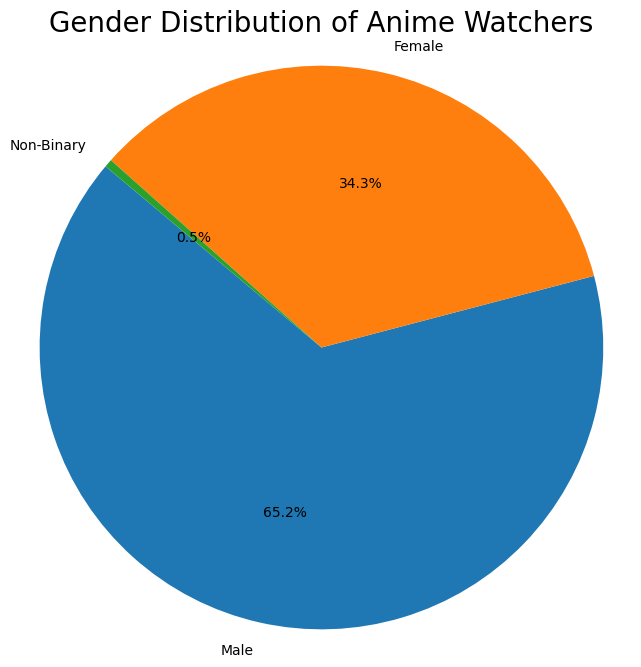

In [30]:
# prompt: generate A pie chart of gender watching anime

import matplotlib.pyplot as plt
# Assuming the 'users' DataFrame has a 'gender' column
if 'gender' in users.columns:
    # Filter out NaN values from the 'gender' column
    gender_counts = users['gender'].dropna().value_counts()

    # Create a pie chart for gender distribution
    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Gender Distribution of Anime Watchers', fontsize=20)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("The 'users' DataFrame does not have a 'gender' column.")


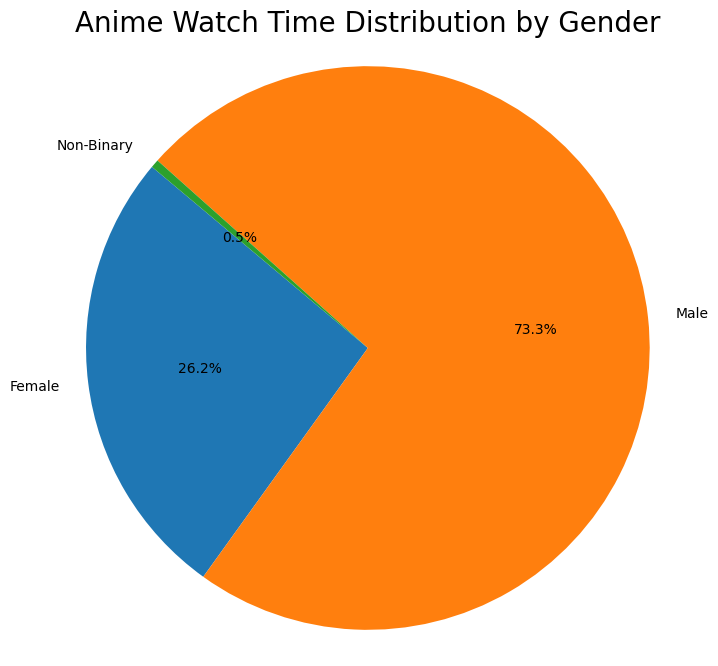

In [33]:

if 'gender' in users.columns and 'user_days_spent_watching' in users.columns:

    gender_watch_time = users.groupby('gender')['user_days_spent_watching'].sum()

    # Filter out any potential 0 values if they skew the chart representation
    gender_watch_time = gender_watch_time[gender_watch_time > 0]

    if not gender_watch_time.empty:
        # Create a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(gender_watch_time, labels=gender_watch_time.index, autopct='%1.1f%%', startangle=140)
        plt.title('Anime Watch Time Distribution by Gender', fontsize=20)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print("No watch time data available for gender distribution.")
else:
    print("The 'users' DataFrame does not contain both 'gender' and 'user_days_spent_watching' columns.")

Top 10 Users by Days Spent Watching Anime:


HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>us…

<ipython-input-34-9580fdf3bad9>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




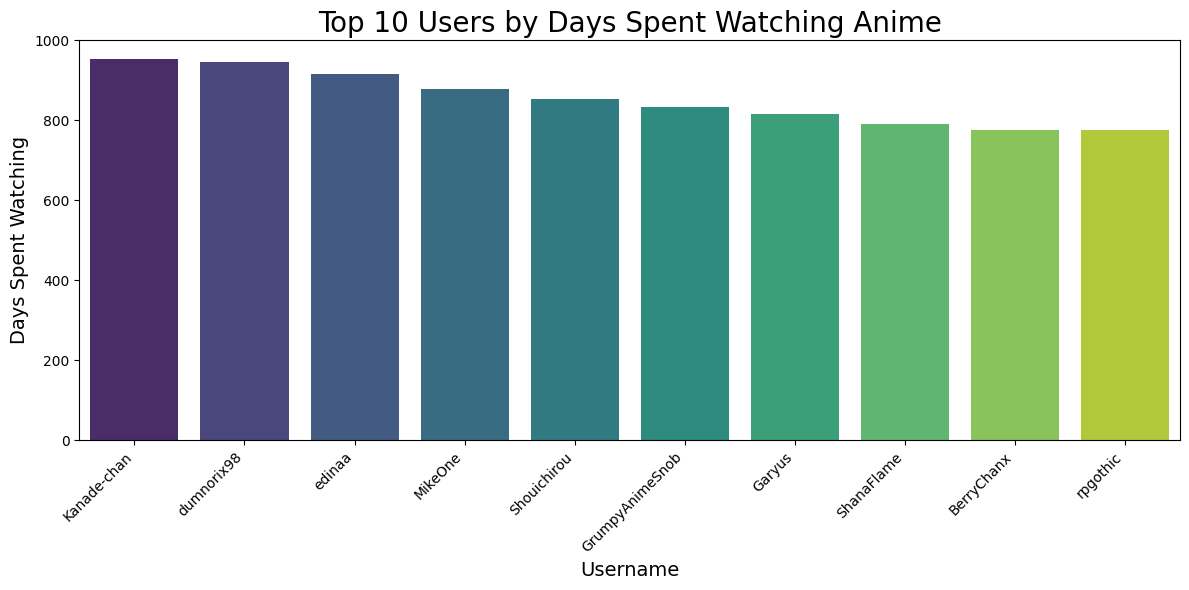

In [34]:
top_users_watch_time = users.nlargest(10, 'user_days_spent_watching')

# Display a table of the top users
print("Top 10 Users by Days Spent Watching Anime:")
display(HTML(top_users_watch_time[['username', 'user_days_spent_watching', 'gender']].to_html(index=False)))

# Create a bar graph of the top users' watch time
plt.figure(figsize=(12, 6))
sns.barplot(x='username', y='user_days_spent_watching', data=top_users_watch_time, palette='viridis')
plt.title('Top 10 Users by Days Spent Watching Anime', fontsize=20)
plt.xlabel('Username', fontsize=14)
plt.ylabel('Days Spent Watching', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

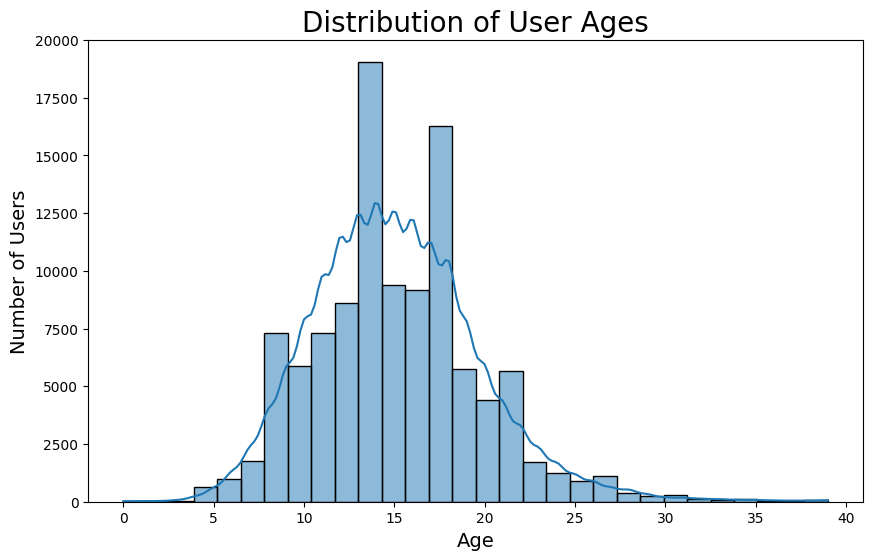

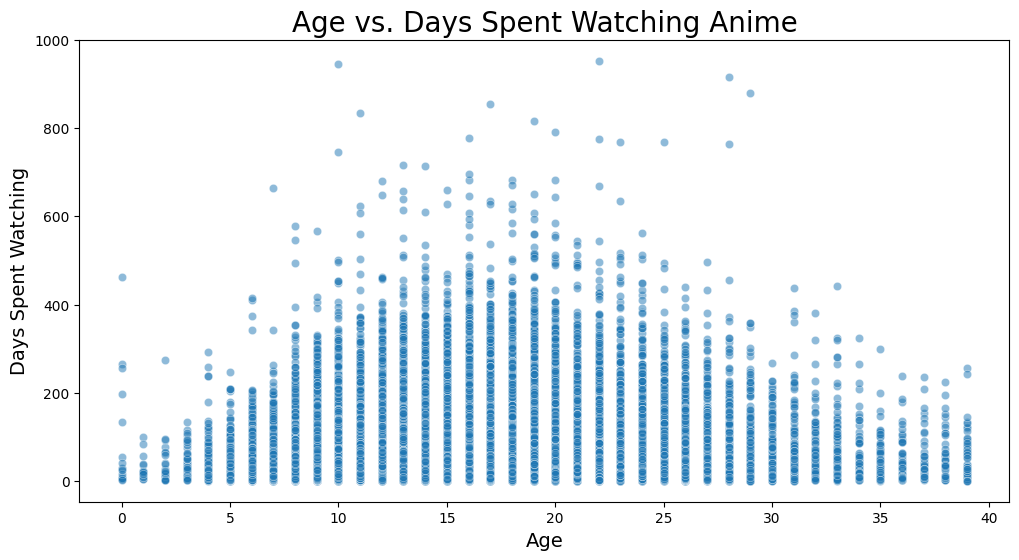

Unique gender values in the data: ['Female' 'Male' 'Non-Binary']


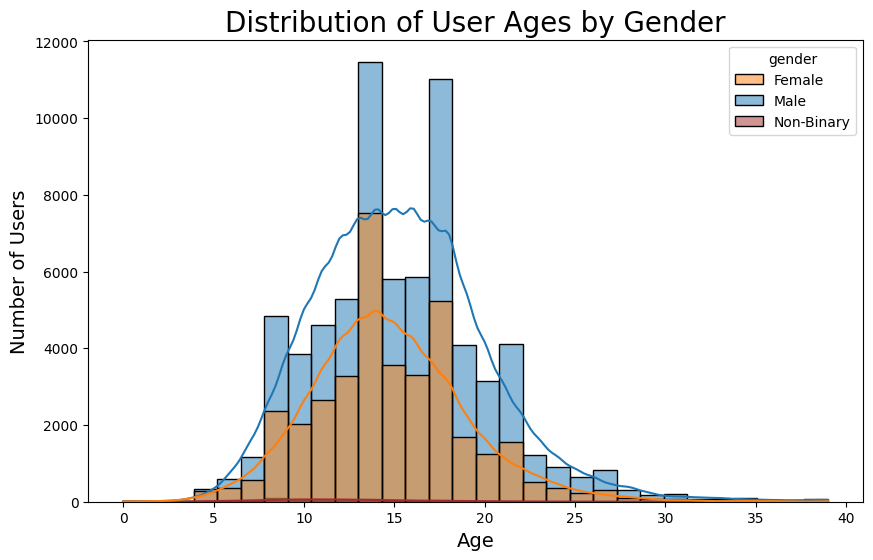

In [43]:

if 'birth_date' in users.columns:
    # Convert 'birth_date' to datetime objects, handling potential errors
    users['birth_date'] = pd.to_datetime(users['birth_date'], errors='coerce')

    # Calculate age
    # We need the current date to calculate age. Let's use the maximum birth date in the dataset as a reference point.
    # A more precise way would be to use the current system date, but this ensures reproducibility with the dataset.
    latest_birth_date = users['birth_date'].max()
    users['age'] = (latest_birth_date - users['birth_date']).dt.days // 365

    # Drop rows where birth_date conversion failed or age is unreasonable (e.g., negative)
    users = users.dropna(subset=['birth_date', 'age'])
    users = users[users['age'] >= 0]

    # Generate visualization: Age distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(users['age'], bins=30, kde=True)
    plt.title('Distribution of User Ages', fontsize=20)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Number of Users', fontsize=14)
    plt.show()

    # Generate visualization: Age vs. Days Spent Watching
    if 'user_days_spent_watching' in users.columns:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='age', y='user_days_spent_watching', data=users, alpha=0.5)
        plt.title('Age vs. Days Spent Watching Anime', fontsize=20)
        plt.xlabel('Age', fontsize=14)
        plt.ylabel('Days Spent Watching', fontsize=14)
        plt.show()
    else:
        print("The 'users' DataFrame does not contain 'user_days_spent_watching' for Age vs. Watch Time visualization.")

    # Generate visualization: Age distribution by gender (if gender column exists)
    if 'gender' in users.columns:
        # Check the unique values in the 'gender' column after dropping NaNs
        # This helps to ensure the palette keys match
        unique_genders = users['gender'].dropna().unique()
        print(f"Unique gender values in the data: {unique_genders}")

        plt.figure(figsize=(10, 6))
        # Define a custom color palette - Ensure keys match the exact capitalization in the data
        # Based on the error, the data has 'Male', 'Female', 'Non-Binary'
        custom_palette = {
            'Male': '#1f77b4',         # Blue
            'Female': '#ff7f0e',       # Orange
            'Non-Binary': '#a52a2a'    # Purple (custom color for non-binary)
        }

        # Plot with custom palette
        sns.histplot(
            data=users.dropna(subset=['gender']),
            x='age',
            hue='gender',
            bins=30,
            kde=True,
            palette=custom_palette
        )
        plt.title('Distribution of User Ages by Gender', fontsize=20)
        plt.xlabel('Age', fontsize=14)
        plt.ylabel('Number of Users', fontsize=14)
        plt.show()
    else:
        print("The 'users' DataFrame does not contain 'gender' for Age distribution by gender visualization.")

else:
    print("The 'users' DataFrame does not contain a 'birth_date' column to calculate age.")

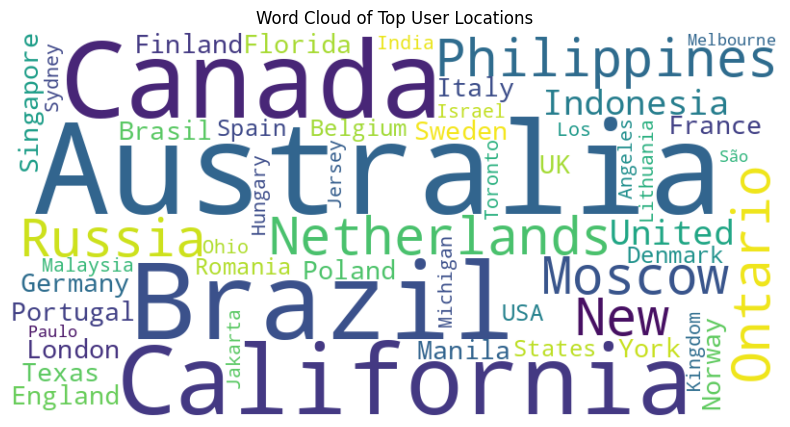

In [44]:
if 'location' in users.columns:
    # Get the top locations
    top_locations = users['location'].dropna().value_counts().nlargest(50) # You can adjust the number 50 as needed

    # Generate a word cloud from the top locations
    location_text = ' '.join(top_locations.index)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(location_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Top User Locations')
    plt.show()
else:
    print("The 'users' DataFrame does not contain a 'location' column.")